In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.0.0-rc0


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
cancer = datasets.load_breast_cancer()

In [9]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [10]:
X = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y = cancer.target

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
X.shape

(569, 30)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [16]:
X_train.shape

(455, 30)

In [17]:
X_test.shape

(114, 30)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [20]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32,
                kernel_size=2,
                activation='relu',
                input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,
                kernel_size=2,
                activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [22]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
455/455 [==============================] - 5s 11ms/sample - loss: 0.7731 - accuracy: 0.6505 - val_loss: 0.6466 - val_accuracy: 0.8070
Epoch 2/50
455/455 [==============================] - 0s 332us/sample - loss: 0.6032 - accuracy: 0.7407 - val_loss: 0.6194 - val_accuracy: 0.8158
Epoch 3/50
455/455 [==============================] - 0s 324us/sample - loss: 0.4823 - accuracy: 0.7868 - val_loss: 0.5886 - val_accuracy: 0.8421
Epoch 4/50
455/455 [==============================] - 0s 324us/sample - loss: 0.4319 - accuracy: 0.8132 - val_loss: 0.5566 - val_accuracy: 0.8772
Epoch 5/50
455/455 [==============================] - 0s 307us/sample - loss: 0.3761 - accuracy: 0.8527 - val_loss: 0.5253 - val_accuracy: 0.8860
Epoch 6/50
455/455 [==============================] - 0s 320us/sample - loss: 0.2858 - accuracy: 0.8813 - val_loss: 0.4938 - val_ac

455/455 [==============================] - 0s 309us/sample - loss: 0.1200 - accuracy: 0.9604 - val_loss: 0.1013 - val_accuracy: 0.9649
Epoch 50/50
455/455 [==============================] - 0s 308us/sample - loss: 0.1110 - accuracy: 0.9714 - val_loss: 0.1004 - val_accuracy: 0.9649


In [24]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [25]:
history.history


{'loss': [0.7730544530428373,
  0.6032441968446249,
  0.4822939150281005,
  0.4319465804886032,
  0.37607842408693753,
  0.2858086012713202,
  0.31658057860702604,
  0.2759148821889699,
  0.2883984346311171,
  0.22637331612653785,
  0.2842627097944637,
  0.19353958512400532,
  0.23252575404041417,
  0.2134864475455258,
  0.21865376325754018,
  0.17243791753119164,
  0.1749451831146911,
  0.17482736659246487,
  0.1707051993890123,
  0.18291510946148046,
  0.15597417184284756,
  0.15612623907707548,
  0.13705510614992497,
  0.15461517723077642,
  0.16928067482434786,
  0.1548432896752934,
  0.137631180866079,
  0.12236482541967224,
  0.14064187800491249,
  0.13700396364738981,
  0.14446564216862667,
  0.17921406767116144,
  0.14878063103654882,
  0.1108794584952213,
  0.14953474553076776,
  0.11131346507386847,
  0.12047848518078144,
  0.09969547867447465,
  0.13819861841070782,
  0.14325963470798272,
  0.1057492672578319,
  0.10768253826178037,
  0.08284253653261688,
  0.096842994078338

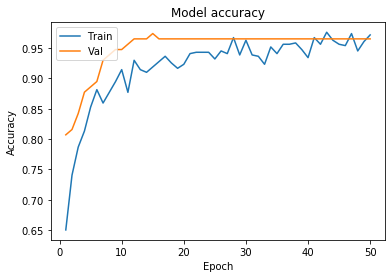

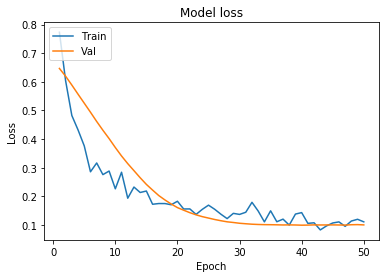

In [26]:
plot_learningCurve(history, epochs)